In [64]:
import matplotlib.pyplot as plt
import numpy
import scipy.stats as stats
from math import (
    exp,
    factorial,
    sqrt
)

In [65]:
# Returns n choose r
def choose(n, r):
    return factorial(n) // factorial(r) // factorial (n-r)

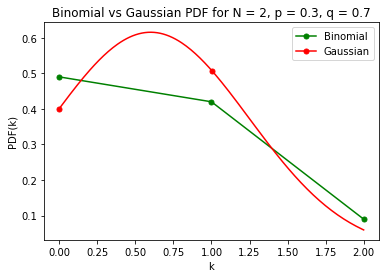

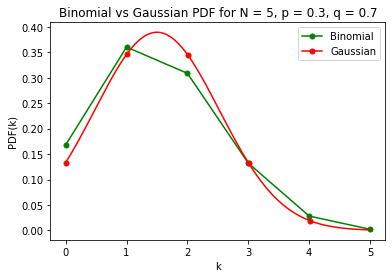

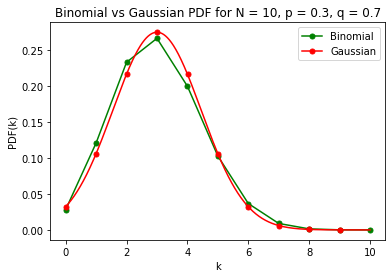

In [78]:
'''
(a)
'''
p = .3
q = 1 - p
num_samples = [2, 5, 10]

for n in num_samples:
    k_list = list(range(n+1))
    # Calculate the binomial probabilities for k = 0, 1, ..., n
    bino_pdf = []
    for k in k_list:
        bino_pdf.append(choose(n, k) * (p ** k) * (q ** (n - k)))

    # Plot the binomial probabilities vs the Gaussian distribution
    plt.plot(k_list, bino_pdf, color = "green", ls = "-", marker = ".", ms = 10, label = "Binomial")

    mean = n * p
    sd = sqrt(n * p * q)
    continous_k = numpy.linspace(0, n, n * 100)
    plt.plot(continous_k, stats.norm.pdf(continous_k, mean, sd), color = "red", marker = ".", markevery = 100, ms = 10, label = "Gaussian")

    plt.title(f"Binomial vs Gaussian PDF for N = {n}, p = {p}, q = {q}")
    plt.xlabel("k")
    plt.ylabel("PDF(k)")
    plt.legend()
    plt.show()

In [79]:
# Iterate through values of n until the difference between the max probability
# between the Binomial and Gaussian are within 1% of each other 
n = 2
while True:
    k_list = list(range(n+1))
    # Calculate the binomial probabilities for k = 0, 1, ..., n
    bino_pdf = []
    for k in k_list:
        bino_pdf.append(choose(n, k) * (p ** k) * (q ** (n - k)))
    max_bino_pdf = max(bino_pdf)
    
    mean = n * p
    sd = sqrt(n * p * q)
    gauss_pdf = stats.norm.pdf(k_list, mean, sd)
    max_gauss_pdf = max(gauss_pdf)

    if abs(max_bino_pdf - max_gauss_pdf) < .01:
        break
    n += 1

print(f"The max PDF evaluated at the integers for Binomial and Guassian are within 1% of each other for n = {n}")
    

The max PDF evaluated at the integers for Binomial and Guassian are within 1% of each other for n = 8


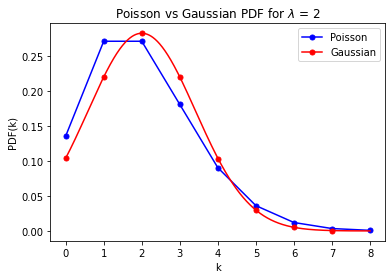

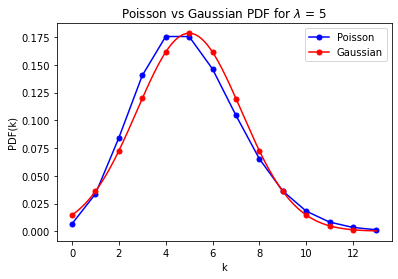

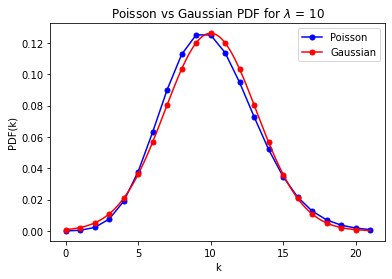

In [80]:
'''
(b)
'''

lambdas = [2, 5, 10]
for l in lambdas:
    # Calculate the Poisson probabilities for k = 0, 1, ..., n
    poisson_pdf = []
    k = 0
    # I calculate PDF(k) until we have captured 99.9% of the occurences
    sum_prob = 0
    while True:
        prob = (l ** k) * exp(-l) / factorial(k)
        poisson_pdf.append(prob)
        sum_prob += prob
        k += 1
        if sum_prob > .999:
            break
    k_list = list(range(len(poisson_pdf)))

    # Plot the binomial probabilities vs the Gaussian distribution
    plt.plot(k_list, poisson_pdf, color = "blue", ls = "-", marker = ".", ms = 10, label = "Poisson")

    mean = l
    sd = sqrt(l)
    continous_k = numpy.linspace(0, len(k_list) - 1, (len(k_list) - 1) * 100)
    plt.plot(continous_k, stats.norm.pdf(continous_k, mean, sd), color = "red", marker = ".", markevery = 100, ms = 10, label = "Gaussian")

    plt.title(r"Poisson vs Gaussian PDF for $\lambda$ = " + f"{l}")
    plt.xlabel("k")
    plt.ylabel("PDF(k)")
    plt.legend()
    plt.show()

In [87]:
# Iterate through values of n until the difference between the max probability
# between the Poisson and Gaussian are within 1% of each other 

l = 1
while True:
    # Calculate the Poisson probabilities for k = 0, 1, ..., n
    poisson_pdf = []
    k = 0
    # I calculate PDF(k) until we have captured 99.9% of the occurences
    sum_prob = 0
    while True:
        prob = (l ** k) * exp(-l) / factorial(k)
        poisson_pdf.append(prob)
        sum_prob += prob
        k += 1
        if sum_prob > .999:
            break
    max_poisson_pdf = max(poisson_pdf)

    k_list = list(range(len(poisson_pdf)))
    mean = l
    sd = sqrt(l)
    gauss_pdf = stats.norm.pdf(k_list, mean, sd)
    max_gauss_pdf = max(gauss_pdf)

    if abs(max_poisson_pdf - max_gauss_pdf) < .01:
        break
    l += 1

print(f"The max PDF evaluated at the integers for Poisson and Guassian are within 1% of each other for lambda = {l}")

The max PDF evaluated at the integers for Binomial and Guassian are within 1% of each other for lambda = 3
